# Toric code 

Due to its simplicity the toric code is one of the most studied topological model. It can
serve as a platform for various quantum information tasks and as a test bed for the properties of topological systems. 

## Toric Code in  Hilbert Space


A square lattice with periodic boundary conditions and qubit (or  spin-$ 1/2 $ particle) on each edge.
The total number of spins is $ N = 2N_xN_y $ and correspondingly the dimension
of the Hilbert space is $ 2^N $.

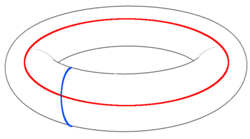


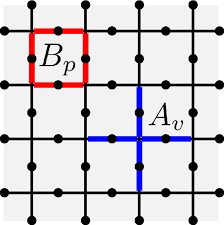

The Hamiltonian of this system is defined in terms of Pauli operators :

$$ H = − \sum_v A_v − \sum_p B_p $$

where $ A_v $ and $ B_p $ are Vertex and Plaquette Operators that we will use on this Hilbert space

to build the toric code.

where 𝐴𝑣 and 𝐵𝑝 are Vertex and Plaquette Operators that we will use on this Hilbert space to build the toric code.

## Vertex and Plaquette Operators


### vertex operator

Given a vertex $𝑣$ which consists of four incident edges $ i ∈ vertex $ $ 𝑣 $, we define the vertex operator as 


$$ A_𝑣 = \prod_{i ∈ vertex 𝑣} σ_ z^{(i)} $$



this is just the product of $σ_z$ applied to the four spins incident on the vertex. 
It returns +1 if there are an even number of incident down spins at that vertex and returns −1 if there are an odd number.As showing in this picture 



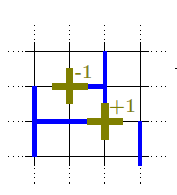

Here it is an animation that presents the application of the vortex operators for an odd number of edges.

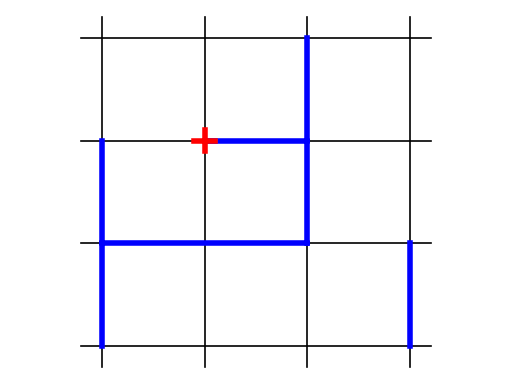

 we will design quantum circuits by using quantum programming framework Qiskit.
 we design a circuit with four quantum bits (qubits) to present Z-syndrome.
 

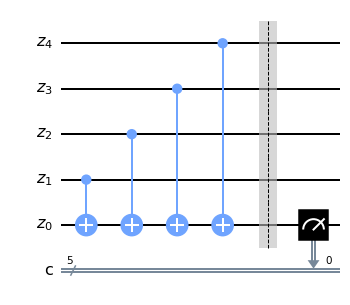

Pauli-z around each vertex


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit 

q = QuantumRegister(5,"z")
c = ClassicalRegister(5,"c")

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# Applying the CNOT operators
qc.cx(q[1],q[0])
qc.cx(q[2],q[0])
qc.cx(q[3],q[0])
qc.cx(q[4],q[0])


qc.barrier()

qc.measure(q[0],c[0])

display(qc.draw(output='mpl',reverse_bits=True))

print("Pauli-z around each vertex")



As you can note that it is equal to (+1) if an even number of incident blue lines and (−1) if an odd number of incident blue lines.
It is obvious that $[ A_𝑣, A_{𝑣'}]=0$ since  $A_𝑣$ only made of $σ_z$ operators and all of these commute with each other.

### Plaquette Operators


Given a plaquette p which contains four edges in a square (edge i ∈ plaquette p)
we define

$$ B_p = \prod_{i ∈ vertex p} σ_ x^{(i)} $$

which flips the state of the spins on all of the edges of the plaquette

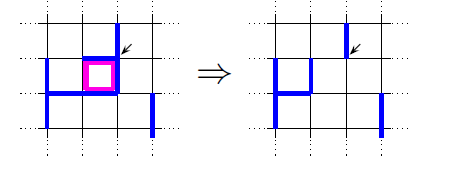

For better visualisation of this operator here is an animation that show the flips of the spins state.

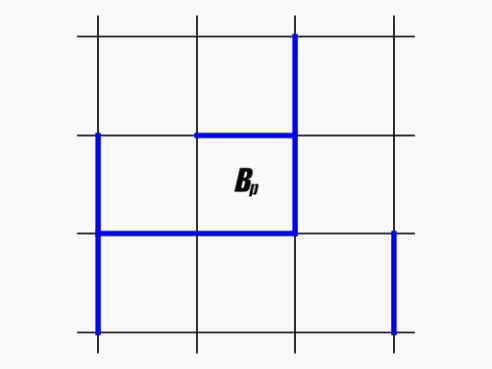

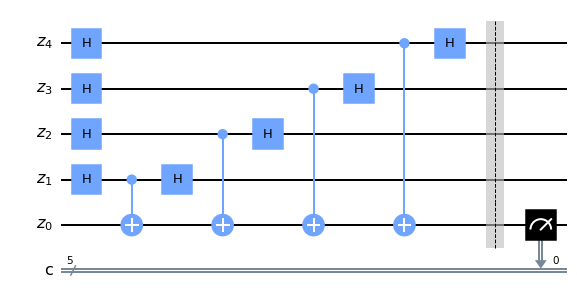

Pauli-x operators around each face


In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q =  QuantumRegister(5,"z")
c = ClassicalRegister(5,"c")

qc = QuantumCircuit(q,c) 

# Our quantum circuit
qc.h(q[1])
qc.cx(q[1],q[0])
qc.h(q[1])
qc.h(q[2])
qc.cx(q[2],q[0])
qc.h(q[2])
qc.h(q[3])
qc.cx(q[3],q[0])
qc.h(q[3])
qc.h(q[4])
qc.cx(q[4],q[0])
qc.h(q[4])

qc.barrier()

qc.measure(q[0],c[0])

display(qc.draw(output='mpl',reverse_bits=True))

print("Pauli-x operators around each face")

The only two possible eigenvalues of B_p are ±1.The operator is off-diagonal it flips spins around a plaquette. Thus the eigenvectors can be written as

$\frac{1}{\sqrt2}(unflipped\, plaquette+flipped\,  plaquette)$ whan eigenvalue equal to +1 and 
$\frac{1}{\sqrt2}(unflipped\,  plaquette-flipped\,  plaquette)$ whan eigenvalue equal to -1.

we should mention that Similarly to vertex operator $[B_p,B_{p'}]=0$ are made only of $σ_x$ operators and all of these commute with each other. and $ [A_𝑣,B_p]=0 $ The obvious case is when $A_𝑣$ and $B_p$ do not share any edges, then the two operators obviously commute.

### Task :
show that $A^2_𝑣 = 1$ and $B^2_p = 1$



 ## Building the Code Space
 

Toric code is used to store quantum information protected from quantum errors and it is widely studied in quantum error correction. In order to store quantum information, we should define the code space to distinguish the legal states from unwanted states, by implementing two simple rules that define our code space. We must check to see that the two rules remain satisfied. If we find that they are not satisfied we know a physical error has occurred, the system has left the code space, and we must then go about trying to correct it.
* #### Rule 1:
  Specify that  $A_𝑣$= 1 for every vertex.

  if it ever finds that $A_𝑣$= −1 then we know we are no longer in the code space, an error has  
  occurred that we must try to repair.
 
* #### Rule 2:
  Specify that $B_p $= 1 for every plaquette.
  If these operators are measured to have a −1 eigenvalue then we know an error has occurred.
  
Now we have all basics to have our code.




Now we start by a wavefunction in the code space: First start in any state of which satisfies Rule 1.We call this configuration the reference configuration. Then to this reference configuration wavefunction, we add all other wavefunctions that can be obtained by flipping plaquettes. We have

$$ |ψ>= \sum_{ \text{all  loop  configs  that can}\\ 
\text{be obtained by flipping plaquettes}\\
\text{from a reference loop config}} \frac{1}{\sqrt N} |\text{loop config} >  $$

N is the normalization constant. By adding up all such flipped configurations, we assure that every plaquette is in the correct superpositon of flipped and upflipped and we satisfy Rule 2!

There are four independent wavefunctions of this form which differ in whether the reference configuration has an even or an odd number of blue edges going around each cycle. All of these states satisfy the constraint rules 1 and 2.

$$ |ψ_{ee}>, |ψ_{eo}>, |ψ_{oe}>, |ψ_{oo}> $$

where e and o means an even or an odd number of blue lines going around a given cycle.

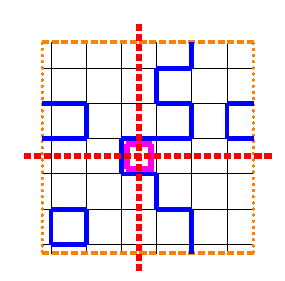

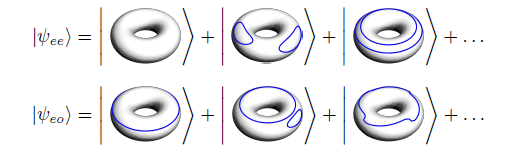

even and odd depends on the sum of all wavefunctions having an even or odd  number of blue strings running around each cycle (vertical in the planar diagram arond one cycle and  horizontal arond the other )

# Excitations

If there are vertices with $A_𝑣$= −1 or plaquettes where $B_p$ = −1, the
system is not in the ground state space. These occurrances, which we
called errors , in the language of topologically ordered matter
should now be considered to be particle (one can excite pairs of anyons on the lattice using single spin operations) excitations.
These quasiparticles correspond to eigenvalue −1 for the corresponding $A_𝑣$ operators and are called $e$-type anyons. An $ e$ anyon positioned at each vertex neighbouring the rotated spin.
An $m$-type anyon lives on plaquettes for which the  $B_p$ operator has eigenvalue −1

The combination of both $e$ and $m$ anyons creates the composite quasiparticle $f$.
The presence of $e$, $m$ and $f$ quasiparticle excitations is detected by measuring the eigenvalues
of the corresponding $A_𝑣$ or $B_p$ operators. Eigenvalue +1 corresponds to the vacuum,
while −1 detects the presence of an anyon.If the same Pauli rotations are applied on
spins of the same vertex or plaquette then they create two overlapping anyons. The resulting
eigenvalue of $A_𝑣$ or $B_p$  is +1. So the outcome of the fusion is the vacuum. 

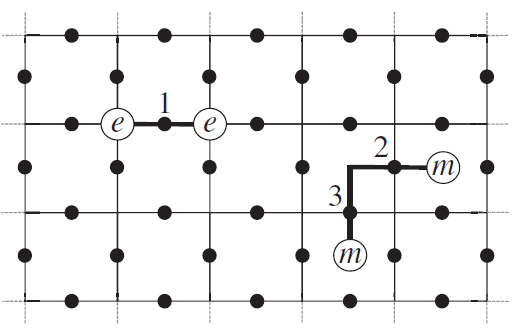

In the more common notation we would write the fusion rules of our excitations as:
$$e × e = I $$
$$m × m = I $$
$$e × m = f $$.

that describe the outcome from combining two anyons, where $I$ is the vacuum state.
A loop of $σ_z$ operators along the lattice can be built from the product of neighbouring $B_p$ operators on plaquettes p and p'. A loop of $σ_x$ operators along the edges of the dual lattice also results from the product of $A_v$ operators.
These loop operators can detect the parity of the total $e$ or $m$ anyons enclosed by the loops.


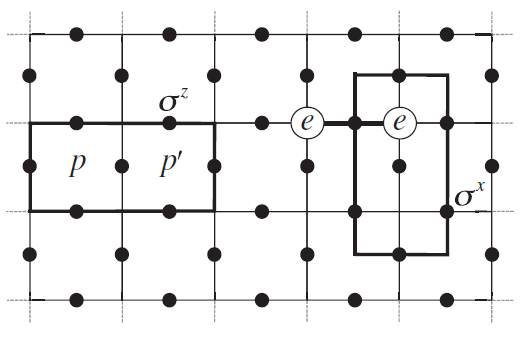

If the elementary square loop that corresponds to $A_v$ has a common edge with the string operator, then this edge-operator will be cancelled and the shape of the string will be deformed
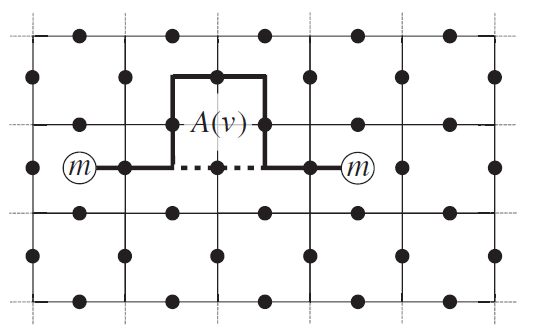

Application of any contractible loop operator on the ground state gives back the same state
with its components rearranged. The excited states inherit this property by being the equal
superposition of all possible strings that connect the two anyons. Hence, the exact shape of
the string does not have any physical meaning. Only the position of the anyons does.


#### Task 
What is the fusion result of an $e$ anyon and the quasiparticle $f$?

##  Anyonic statistics

Consider two $e$ anyons exchanging their position by applying $σ_z$ rotations.
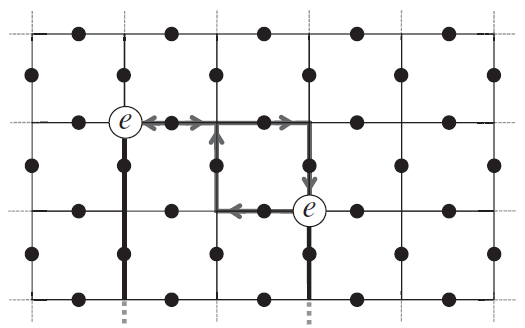

The final configuration is equal to the initial one with the addition of a loop of $σ_z’s$ passing through
the position of both anyons. As this loop operator acts on plaquettes with no m anyons, it
gives back the identity. Hence, the final state of the system equals the initial one, thereby
signalling the bosonic mutual statistics of e anyons.

The same argument holds for the $m$ anyons, but not for the $f$ anyons.
Consider a pair of $f’s$ constructed out of the constituent $e$ and $m$ anyons,
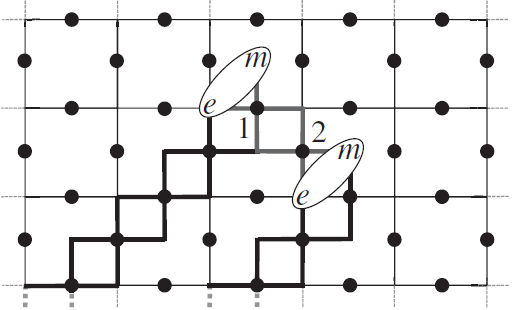

The anyon $f$ is an extended object as it occupies a plaquette and its neighbouring vertex. We would like to exchange the positions of the $f’s$ without rotating them. An overall rotation could cause extra phase factors due to the spin particle $f$ might have. At the end the string operators cancel each other and an overall phase of −1 remains, which reveals the fermionic statistics of $f$ particles.

## Conclusion 

Having an anyonic model described in terms of spin states enables us to study the spin rotations
that are necessary to manipulate the states of the anyons. Abelian anyon models, such as
the toric code, serve well in protecting quantum information from a variety of errors.
Non-Abelian anyons have a richer structure and can support universal quantum computation. These models are rather complicated, as for example they need spin lattices with at least six level spins, posing challenges for their realisation in the laboratory.

Physically, many body systems can give rise of different types of anyons in some special conditions. This is the case of topological superconductors where Majorana fermions and Ising anyons can exist and the Fractional Quantum Hall Effect where many types of anyons like Fibonacci anyons can emerge.

### References

* Eric Dennis, Alexei Kitaev, Andrew Landahl, and John Preskill. Topological quantum memory.
  Journal of Mathematical Physics, 43:4452–4505, 2002.[Ref](https://arxiv.org/abs/quant-ph/0110143)
* Paul Herringer. The Toric Code. arXiv:2207.00616v2.[Ref](https://arxiv.org/abs/2207.00616v1)
* Jiannis K . Pachos. Introduction to Topological Quantum Computation (Cambridge University
  Press). 2012. [Ref](https://arxiv.org/abs/1705.04103v1)
* Joschka Roffe. Quantum Error Correction: An Introductory Guide. [Ref](https://arxiv.org/abs/1907.11157v1)